In [2]:
# Aim: To visualize PM concentration of Diwali and NonDiwali day of multiple locations of different cities
# and plot it on spatial file of cities using subplot.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')
import geopandas as gd

###  Data of cities

In [4]:
# Cities= Mumbai,Delhi, Ahmedabad, Lucknow, Hyderabad, Bengaluru, Chennai and Kolkata.
Mumbai=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/Mumbai.xlsx')
Mumbai.dropna(subset=['Diwali','NonDiwali'],inplace=True)

Delhi=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/Delhi.xlsx')
Delhi.dropna(subset=['Diwali','NonDiwali'],inplace=True)

Ahmedabad=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/Ahmedabad.xlsx')
Ahmedabad.dropna(subset=['Diwali','NonDiwali'],inplace=True)

Lucknow=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/Lucknow.xlsx')
Lucknow.dropna(subset=['Diwali','NonDiwali'],inplace=True)

Hyderabad=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/Hyderabad.xlsx')
Hyderabad.dropna(subset=['Diwali','NonDiwali'],inplace=True)

Bengaluru=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/Bengaluru.xlsx')
Bengaluru.dropna(subset=['Diwali','NonDiwali'],inplace=True)

Chennai=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/Chennai.xlsx')
Chennai.dropna(subset=['Diwali','NonDiwali'],inplace=True)

Kolkata=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/Kolkata.xlsx')
Kolkata.dropna(subset=['Diwali','NonDiwali'],inplace=True)

In [5]:
Mumbai.head()

,State,City,Station,Diwali,NonDiwali,Condition_diwali,Condition_NonDiwali,Rank_Diwali,Rank_NonDiwali,Lattitude,Longitude,PreD,Diwali.1,PostD,Division
0,Maharashtra,Mumbai,BandraKurlaComplexMumbaiIITM_mean,91.020694,44.136249,High,Limit,2,1,19.068789,72.870265,34.878485,91.020694,53.394014,WestIndia
3,Maharashtra,Mumbai,BorivaliEastMumbaiMPCB_mean,49.148592,41.503001,Limit,Limit,1,1,19.229781,72.860856,35.667546,49.148592,47.338456,WestIndia
4,Maharashtra,Mumbai,ChakalaAndheriEastMumbaiIITM_mean,120.963611,66.685344,VeryHigh,High,3,2,19.109771,72.858267,47.175655,120.963611,86.195033,WestIndia
5,Maharashtra,Mumbai,ChhatrapatiShivajiIntlAirportT2MumbaiMPCB_mean,84.428611,46.415124,High,Limit,2,1,19.097437,72.874502,35.756786,84.428611,57.073462,WestIndia
6,Maharashtra,Mumbai,ColabaMumbaiMPCB_mean,70.817083,47.066563,High,Limit,2,1,18.906703,72.814712,32.319930,70.817083,61.813197,WestIndia


### Spatial data of cities

In [7]:
df_mumbai=gpd.read_file('https://raw.githubusercontent.com/sam-as/Municipal_Spatial_Data/master/Mumbai/BMC_Wards.geojson')

df_Delhi=gpd.read_file('https://raw.githubusercontent.com/devdattaT/Municipal_Spatial_Data/master/Delhi/Delhi_Wards.geojson')

df_Lucknow=gpd.read_file('https://raw.githubusercontent.com/sam-as/Municipal_Spatial_Data/master/Lucknow/Lucknow_ward_boundary.geojson')

df_hyderabad=gpd.read_file('https://raw.githubusercontent.com/devdattaT/Municipal_Spatial_Data/master/Hyderabad/ghmc-wards.geojson')

df_Ahmedabad=gpd.read_file('https://raw.githubusercontent.com/devdattaT/Municipal_Spatial_Data/master/Ahmedabad/Wards.geojson')

df_Chennai=gpd.read_file('https://raw.githubusercontent.com/devdattaT/Municipal_Spatial_Data/master/Chennai/Wards.geojson')

df_Bengaluru=gpd.read_file('https://raw.githubusercontent.com/devdattaT/Municipal_Spatial_Data/master/Bangalore/BBMP.GeoJSON')

path_Kol=r"C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/kolkata_wards.shp" # Kolkata City
df_Kolkata=gpd.read_file(path_Kol) 

In [8]:
df_mumbai.head()

,gid,name,geometry
0,1,A,"MULTIPOLYGON (((72.84025 18.94881, 72.84030 18..."
1,2,B,"MULTIPOLYGON (((72.84456 18.96342, 72.84461 18..."
2,3,C,"MULTIPOLYGON (((72.83198 18.96174, 72.83197 18..."
3,4,D,"MULTIPOLYGON (((72.81873 18.96901, 72.81878 18..."
4,5,E,"MULTIPOLYGON (((72.84677 18.98183, 72.84658 18..."


### Plotting

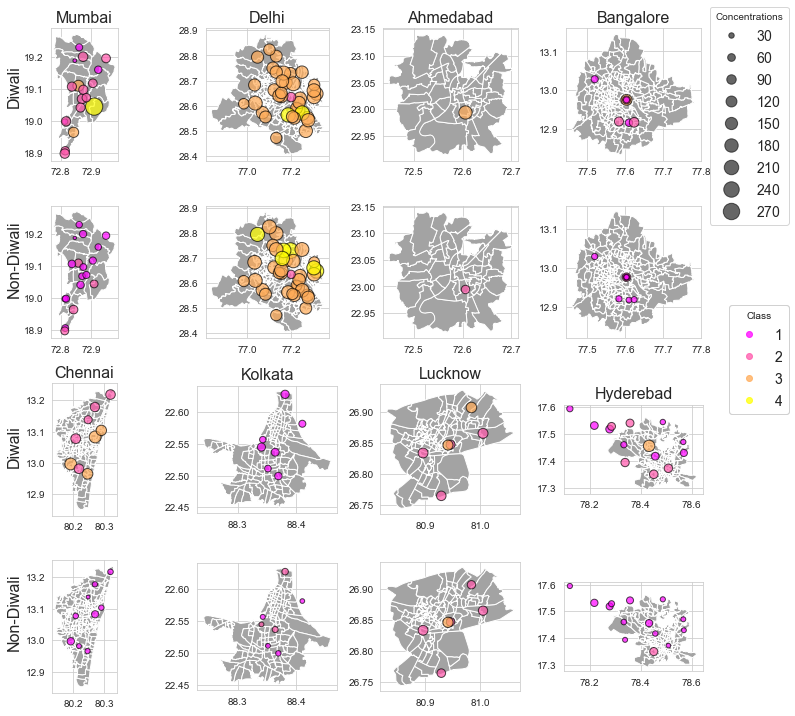

In [9]:
fig, ax = plt.subplots(4,4,figsize = (10,10))# Figure and subplots
#Mumbai
df_mumbai.to_crs(epsg=4326).plot(ax=ax[0,0], color='#A3A3A3' )
x, y = (Mumbai['Lattitude'].values, Mumbai['Longitude'].values)
scatter1=ax[0,0].scatter('Longitude','Lattitude', alpha=0.7, fc = 'white' , ec = 'black',c='Rank_Diwali',vmin=1, vmax=4,
                s='Diwali',data=Mumbai,cmap ="spring")# Diwali Day

df_mumbai.to_crs(epsg=4326).plot(ax=ax[1,0], color='#A3A3A3')
x, y = (Mumbai['Lattitude'].values, Mumbai['Longitude'].values)
ax[1,0].scatter('Longitude','Lattitude', alpha=0.7, fc = 'white' , ec = 'black', c='Rank_NonDiwali' ,vmin=1, vmax=4,
                s='NonDiwali',data=Mumbai,cmap ="spring")# NonDiwali Day
#Delhi
df_Delhi.to_crs(epsg=4326).plot(ax=ax[0,1], color='#A3A3A3' )
x, y = (Delhi['Lattitude'].values, Delhi['Longitude'].values)
ax[0,1].scatter('Longitude','Lattitude', alpha=0.7, fc = 'white' , ec = 'black', c='Rank_Diwali' ,vmin=1, vmax=4,
                         s='Diwali',data=Delhi,cmap ="spring")

df_Delhi.to_crs(epsg=4326).plot(ax=ax[1,1], color='#A3A3A3')
x, y = (Delhi['Lattitude'].values, Delhi['Longitude'].values)
ax[1,1].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black', c='Rank_NonDiwali' ,vmin=1, vmax=4,
                         s='NonDiwali',data=Delhi,cmap ="spring")
# Ahmedabad
df_Ahmedabad.to_crs(epsg=4326).plot(ax=ax[0,2], color='#A3A3A3' )
x, y = (Ahmedabad['Lattitude'].values, Ahmedabad['Longitude'].values)
ax[0,2].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black',c='Rank_Diwali' ,vmin=1, vmax=4,
                s='Diwali',data=Ahmedabad,cmap ="spring")

df_Ahmedabad.to_crs(epsg=4326).plot(ax=ax[1,2], color='#A3A3A3')
x, y = (Ahmedabad['Lattitude'].values, Ahmedabad['Longitude'].values)
ax[1,2].scatter('Longitude','Lattitude', alpha=0.7, fc = 'white' , ec = 'black',c='Rank_NonDiwali' ,vmin=1, vmax=4,
                s='NonDiwali',data=Ahmedabad,cmap ="spring")
# Bengaluru
df_Bengaluru.to_crs(epsg=4326).plot(ax=ax[0,3], color='#A3A3A3' )
x, y = (Bengaluru['Lattitude'].values, Bengaluru['Longitude'].values)
ax[0,3].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black', c='Rank_Diwali' ,vmin=1, vmax=4,
                s='Diwali',data=Bengaluru,cmap ="spring")

df_Bengaluru.to_crs(epsg=4326).plot(ax=ax[1,3], color='#A3A3A3')
x, y = (Bengaluru['Lattitude'].values, Bengaluru['Longitude'].values)
ax[1,3].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black',c='Rank_NonDiwali' ,vmin=1, vmax=4,
                s='NonDiwali',data=Bengaluru,cmap ="spring")
# Chennai
df_Chennai.to_crs(epsg=4326).plot(ax=ax[2,0], color='#A3A3A3' )
x, y = (Chennai['Lattitude'].values, Chennai['Longitude'].values)
ax[2,0].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black',c='Rank_Diwali' ,vmin=1, vmax=4,
                s='Diwali',data=Chennai,cmap ="spring")

df_Chennai.to_crs(epsg=4326).plot(ax=ax[3,0], color='#A3A3A3')
x, y = (Chennai['Lattitude'].values, Chennai['Longitude'].values)
ax[3,0].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black',c='Rank_NonDiwali' ,vmin=1, vmax=4,
                s='NonDiwali',data=Chennai,cmap ="spring")
# Kolkata
df_Kolkata.to_crs(epsg=4326).plot(ax=ax[2,1], color='#A3A3A3')
x, y = (Kolkata['Lattitude'].values, Kolkata['Longitude'].values)
ax[2,1].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black', c='Rank_Diwali' ,vmin=1, vmax=4,
                s='NonDiwali',data=Kolkata,cmap ="spring")

df_Kolkata.to_crs(epsg=4326).plot(ax=ax[3,1], color='#A3A3A3' )
x, y = (Kolkata['Lattitude'].values, Kolkata['Longitude'].values)
ax[3,1].scatter('Longitude','Lattitude', alpha=0.7, fc = 'white' , ec = 'black',c='Rank_NonDiwali' ,vmin=1, vmax=4,
                s='Diwali',data=Kolkata,cmap ="spring")

# Lucknow
df_Lucknow.to_crs(epsg=4326).plot(ax=ax[2,2], color='#A3A3A3' )
x, y = (Lucknow['Lattitude'].values, Lucknow['Longitude'].values)
ax[2,2].scatter('Longitude','Lattitude',alpha=0.7, fc = 'white' ,ec = 'black',  c='Rank_Diwali' ,vmin=1, vmax=4,
                s='Diwali',data=Lucknow,cmap ="spring")

df_Lucknow.to_crs(epsg=4326).plot(ax=ax[3,2], color='#A3A3A3')
x, y = (Lucknow['Lattitude'].values, Lucknow['Longitude'].values)
ax[3,2].scatter('Longitude','Lattitude', alpha=0.7, fc = 'white' , ec = 'black', c='Rank_NonDiwali' ,vmin=1, vmax=4,
                s='NonDiwali',data=Lucknow,cmap ="spring")
# Hyderabad
df_hyderabad.to_crs(epsg=4326).plot(ax=ax[2,3], color='#A3A3A3' )
x, y = (Hyderabad['Lattitude'].values, Hyderabad['Longitude'].values)
ax[2,3].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black',c='Rank_Diwali' ,vmin=1, vmax=4,
                s='Diwali',data=Hyderabad,cmap ="spring")

df_hyderabad.to_crs(epsg=4326).plot(ax=ax[3,3], color='#A3A3A3')
x, y = (Hyderabad['Lattitude'].values, Hyderabad['Longitude'].values)
ax[3,3].scatter('Longitude','Lattitude',  alpha=0.7, fc = 'white' , ec = 'black',c='Rank_NonDiwali' ,vmin=1, vmax=4,
                s='NonDiwali',data=Hyderabad,cmap ="spring")

#-----------------------Title for each city subplot------------
ax[0,0].set_title('Mumbai',fontsize=16)
ax[0,1].set_title('Delhi',fontsize=16)
ax[0,2].set_title('Ahmedabad',fontsize=16)
ax[0,3].set_title('Bangalore',fontsize=16)
ax[2,0].set_title('Chennai',fontsize=16)
ax[2,1].set_title('Kolkata',fontsize=16)
ax[2,2].set_title('Lucknow',fontsize=16)
ax[2,3].set_title('Hyderebad',fontsize=16)

#------------Placing texts on Plot----------------------

fig.text( 0.005, 0.88,'Diwali', va='center',rotation='vertical', fontsize = 16)
fig.text( 0.005, 0.64,'Non-Diwali', va='center',rotation='vertical', fontsize = 16)
fig.text( 0.005, 0.38,'Diwali', va='center',rotation='vertical', fontsize = 16)
fig.text( 0.005, 0.15,'Non-Diwali', va='center',rotation='vertical', fontsize = 16)


#--------- ----------Legends-------------------------------------------------------
#A] Colour based on classes
legend1 = fig.legend(*scatter1.legend_elements(),bbox_to_anchor=(1.1, 0.5),
                    loc="center right", title="Class",fontsize=14)#
fig.add_artist(legend1)

# B] Bubble plot size based on concentration
handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.6)  
legend2 = fig.legend(handles, labels, bbox_to_anchor=(1.1, 1), loc="upper right", title="Concentrations", fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig("Cities_Spatial.jpg")